In [68]:
import PIL.ImageFilter
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import os
from glob import glob
from keras.preprocessing.image import load_img, img_to_array
import multiprocessing as mp 
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from huggingface_hub import from_pretrained_keras
from PIL import ImageFilter, ImageEnhance
import seaborn as sns

np.random.seed(42)

def load_data(files, start=0, end=10, augment_fn = None): #same accuracy for 90,180, 270 rotation
    X = []
    y = []
    for f in files[start:end]:
        img = load_img(f, target_size=(50, 50))
        print(f'process file {f}')
        if augment_fn is not None:
            sample = augment_fn(img)
        else:    
            sample = tf.convert_to_tensor(img)
        X.append(sample)
        y.append(f[-5])
    return np.array(files[start:end]), np.stack(X), np.array(y, dtype=float)

In [38]:
result = pd.read_csv('all_outputs.csv')
files = result['# file']
n = 1000
sample = np.random.randint(0, len(files), n)
sample_files = files[sample]
sample_true_y = result.iloc[sample]['true_y']

bc_model = keras.models.load_model("../models/CanDetect.keras")

In [39]:
_, x, _ = load_data(sample_files, start=0, end=len(files))
predictions_logits = bc_model.predict(x)
predictions_clss = np.where(predictions_logits > 0.5, 1, 0)

print(confusion_matrix(sample_true_y, predictions_clss))
print(accuracy_score(sample_true_y, predictions_clss))

process file ../data/12820/0/12820_idx5_x1951_y1351_class0.png
process file ../data/10305/0/10305_idx5_x2251_y1901_class0.png
process file ../data/16553/0/16553_idx5_x1401_y601_class0.png
process file ../data/10275/0/10275_idx5_x2101_y351_class0.png
process file ../data/15902/1/15902_idx5_x2801_y1651_class1.png
process file ../data/9323/0/9323_idx5_x2301_y1401_class0.png
process file ../data/12873/1/12873_idx5_x1601_y851_class1.png
process file ../data/15516/1/15516_idx5_x1801_y1401_class1.png
process file ../data/13693/0/13693_idx5_x2801_y2301_class0.png
process file ../data/13459/0/13459_idx5_x2301_y1051_class0.png
process file ../data/12947/0/12947_idx5_x3001_y1301_class0.png
process file ../data/9177/0/9177_idx5_x2151_y551_class0.png
process file ../data/9257/1/9257_idx5_x2001_y851_class1.png
process file ../data/8914/0/8914_idx5_x2951_y2901_class0.png
process file ../data/14305/1/14305_idx5_x1401_y501_class1.png
process file ../data/9345/0/9345_idx5_x1351_y1751_class0.png
process 

process file ../data/12820/0/12820_idx5_x1951_y1351_class0.png
process file ../data/10305/0/10305_idx5_x2251_y1901_class0.png
process file ../data/16553/0/16553_idx5_x1401_y601_class0.png
process file ../data/10275/0/10275_idx5_x2101_y351_class0.png
process file ../data/15902/1/15902_idx5_x2801_y1651_class1.png
process file ../data/9323/0/9323_idx5_x2301_y1401_class0.png
process file ../data/12873/1/12873_idx5_x1601_y851_class1.png
process file ../data/15516/1/15516_idx5_x1801_y1401_class1.png
process file ../data/13693/0/13693_idx5_x2801_y2301_class0.png
process file ../data/13459/0/13459_idx5_x2301_y1051_class0.png
process file ../data/12947/0/12947_idx5_x3001_y1301_class0.png
process file ../data/9177/0/9177_idx5_x2151_y551_class0.png
process file ../data/9257/1/9257_idx5_x2001_y851_class1.png
process file ../data/8914/0/8914_idx5_x2951_y2901_class0.png
process file ../data/14305/1/14305_idx5_x1401_y501_class1.png
process file ../data/9345/0/9345_idx5_x1351_y1751_class0.png
process 

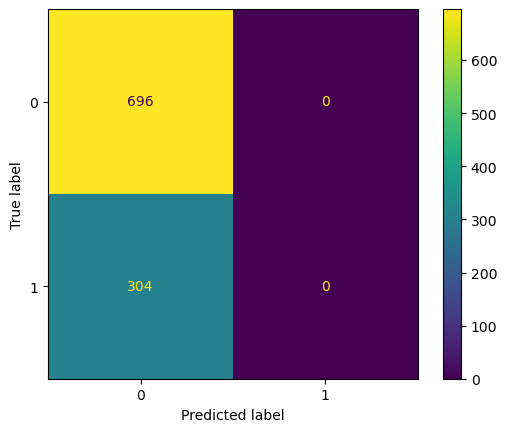

In [95]:
def to_gray_scale(img):
    gs_img = img.convert("L")
    t = tf.convert_to_tensor(gs_img)
    t = tf.stack([t, t, t], axis=-1)
    return t

_, x, _ = load_data(sample_files, start=0, end=len(files), augment_fn=to_gray_scale)
predictions_logits = bc_model.predict(x)
predictions_clss = np.where(predictions_logits > 0.5, 1, 0)

print(confusion_matrix(sample_true_y, predictions_clss))
print(accuracy_score(sample_true_y, predictions_clss))

cm = confusion_matrix(sample_true_y, predictions_clss)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(accuracy_score(sample_true_y, predictions_clss))

In [53]:
def to_darker(img):
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(0.5)
    t = tf.convert_to_tensor(img)
    return t

_, x, _ = load_data(sample_files, start=0, end=len(files), augment_fn=to_darker)
predictions_logits = bc_model.predict(x)
predictions_clss = np.where(predictions_logits > 0.5, 1, 0)

print(confusion_matrix(sample_true_y, predictions_clss))
print(accuracy_score(sample_true_y, predictions_clss))

process file ../data/12820/0/12820_idx5_x1951_y1351_class0.png
process file ../data/10305/0/10305_idx5_x2251_y1901_class0.png
process file ../data/16553/0/16553_idx5_x1401_y601_class0.png
process file ../data/10275/0/10275_idx5_x2101_y351_class0.png
process file ../data/15902/1/15902_idx5_x2801_y1651_class1.png
process file ../data/9323/0/9323_idx5_x2301_y1401_class0.png
process file ../data/12873/1/12873_idx5_x1601_y851_class1.png
process file ../data/15516/1/15516_idx5_x1801_y1401_class1.png
process file ../data/13693/0/13693_idx5_x2801_y2301_class0.png
process file ../data/13459/0/13459_idx5_x2301_y1051_class0.png
process file ../data/12947/0/12947_idx5_x3001_y1301_class0.png
process file ../data/9177/0/9177_idx5_x2151_y551_class0.png
process file ../data/9257/1/9257_idx5_x2001_y851_class1.png
process file ../data/8914/0/8914_idx5_x2951_y2901_class0.png
process file ../data/14305/1/14305_idx5_x1401_y501_class1.png
process file ../data/9345/0/9345_idx5_x1351_y1751_class0.png
process 

In [64]:
def adjust_brightness(factor):
    def adjuster(img):    
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(factor)
        t = tf.convert_to_tensor(img)
        return t
    return adjuster

brightness = np.linspace(0.5, 1.5, 11)
accuracies = []

for factor in brightness:
    _, x, _ = load_data(sample_files, start=0, end=len(files), augment_fn=adjust_brightness(factor))
    predictions_logits = bc_model.predict(x)
    predictions_clss = np.where(predictions_logits > 0.5, 1, 0)
    acc = accuracy_score(sample_true_y, predictions_clss)
    print(acc)
    accuracies.append(acc)    

process file ../data/12820/0/12820_idx5_x1951_y1351_class0.png
process file ../data/10305/0/10305_idx5_x2251_y1901_class0.png
process file ../data/16553/0/16553_idx5_x1401_y601_class0.png
process file ../data/10275/0/10275_idx5_x2101_y351_class0.png
process file ../data/15902/1/15902_idx5_x2801_y1651_class1.png
process file ../data/9323/0/9323_idx5_x2301_y1401_class0.png
process file ../data/12873/1/12873_idx5_x1601_y851_class1.png
process file ../data/15516/1/15516_idx5_x1801_y1401_class1.png
process file ../data/13693/0/13693_idx5_x2801_y2301_class0.png
process file ../data/13459/0/13459_idx5_x2301_y1051_class0.png
process file ../data/12947/0/12947_idx5_x3001_y1301_class0.png
process file ../data/9177/0/9177_idx5_x2151_y551_class0.png
process file ../data/9257/1/9257_idx5_x2001_y851_class1.png
process file ../data/8914/0/8914_idx5_x2951_y2901_class0.png
process file ../data/14305/1/14305_idx5_x1401_y501_class1.png
process file ../data/9345/0/9345_idx5_x1351_y1751_class0.png
process 

process file ../data/12820/0/12820_idx5_x1951_y1351_class0.png
process file ../data/10305/0/10305_idx5_x2251_y1901_class0.png
process file ../data/16553/0/16553_idx5_x1401_y601_class0.png
process file ../data/10275/0/10275_idx5_x2101_y351_class0.png
process file ../data/15902/1/15902_idx5_x2801_y1651_class1.png
process file ../data/9323/0/9323_idx5_x2301_y1401_class0.png
process file ../data/12873/1/12873_idx5_x1601_y851_class1.png
process file ../data/15516/1/15516_idx5_x1801_y1401_class1.png
process file ../data/13693/0/13693_idx5_x2801_y2301_class0.png
process file ../data/13459/0/13459_idx5_x2301_y1051_class0.png
process file ../data/12947/0/12947_idx5_x3001_y1301_class0.png
process file ../data/9177/0/9177_idx5_x2151_y551_class0.png
process file ../data/9257/1/9257_idx5_x2001_y851_class1.png
process file ../data/8914/0/8914_idx5_x2951_y2901_class0.png
process file ../data/14305/1/14305_idx5_x1401_y501_class1.png
process file ../data/9345/0/9345_idx5_x1351_y1751_class0.png
process 

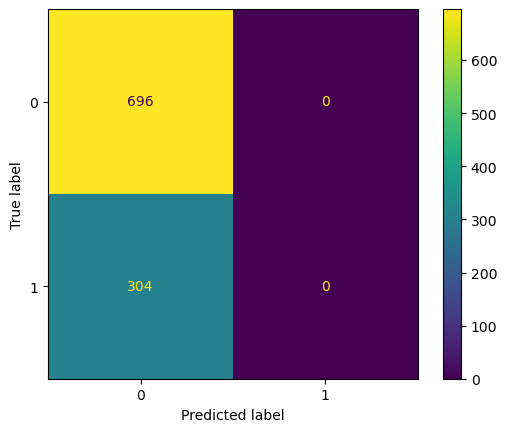

In [93]:
_, x, _ = load_data(sample_files, start=0, end=len(files), augment_fn=adjust_brightness(0.5))
predictions_logits = bc_model.predict(x)
predictions_clss = np.where(predictions_logits > 0.5, 1, 0)

cm = confusion_matrix(sample_true_y, predictions_clss)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(accuracy_score(sample_true_y, predictions_clss))

/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

<Axes: xlabel='brightness factor', ylabel='accuracy'>

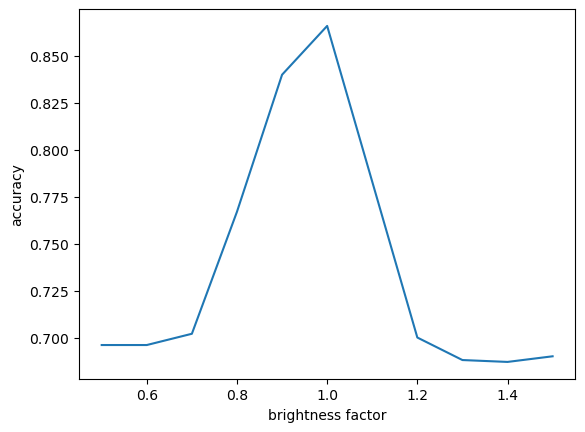

In [70]:
df = pd.DataFrame({'accuracy': accuracies, 'brightness factor': brightness})
sns.lineplot(df, x='brightness factor', y='accuracy')

In [90]:
def get_gaussian_blur_filter(factor):
    def adjuster(img):  
        img = img.filter(ImageFilter.GaussianBlur(factor))
        t = tf.convert_to_tensor(img)
        return t
    return adjuster

sample2 = np.random.randint(0, len(files), 100)
sample_files2 = files[sample2]
sample_true_y2 = result.iloc[sample2]['true_y']

blur = np.linspace(0, 2, 21)
accuracies = []

for factor in blur:
    _, x, _ = load_data(sample_files2, start=0, end=len(files), augment_fn=get_gaussian_blur_filter(factor))
    predictions_logits = bc_model.predict(x)
    predictions_clss = np.where(predictions_logits > 0.5, 1, 0)
    acc = accuracy_score(sample_true_y2, predictions_clss)
    print(acc)
    accuracies.append(acc)    

process file ../data/12900/1/12900_idx5_x2701_y2201_class1.png
process file ../data/13693/0/13693_idx5_x1751_y1751_class0.png
process file ../data/15472/1/15472_idx5_x1301_y901_class1.png
process file ../data/12821/0/12821_idx5_x1901_y1801_class0.png
process file ../data/12895/0/12895_idx5_x2651_y701_class0.png
process file ../data/10307/0/10307_idx5_x801_y1551_class0.png
process file ../data/10255/0/10255_idx5_x751_y1701_class0.png
process file ../data/16014/1/16014_idx5_x601_y451_class1.png
process file ../data/15902/0/15902_idx5_x3501_y2001_class0.png
process file ../data/9255/0/9255_idx5_x2351_y201_class0.png
process file ../data/15633/0/15633_idx5_x1901_y901_class0.png
process file ../data/12820/0/12820_idx5_x601_y1051_class0.png
process file ../data/12934/0/12934_idx5_x1501_y2601_class0.png
process file ../data/16896/0/16896_idx5_x1401_y251_class0.png
process file ../data/10268/0/10268_idx5_x3451_y451_class0.png
process file ../data/13613/0/13613_idx5_x2501_y951_class0.png
proces

process file ../data/12820/0/12820_idx5_x1951_y1351_class0.png
process file ../data/10305/0/10305_idx5_x2251_y1901_class0.png
process file ../data/16553/0/16553_idx5_x1401_y601_class0.png
process file ../data/10275/0/10275_idx5_x2101_y351_class0.png
process file ../data/15902/1/15902_idx5_x2801_y1651_class1.png
process file ../data/9323/0/9323_idx5_x2301_y1401_class0.png
process file ../data/12873/1/12873_idx5_x1601_y851_class1.png
process file ../data/15516/1/15516_idx5_x1801_y1401_class1.png
process file ../data/13693/0/13693_idx5_x2801_y2301_class0.png
process file ../data/13459/0/13459_idx5_x2301_y1051_class0.png
process file ../data/12947/0/12947_idx5_x3001_y1301_class0.png
process file ../data/9177/0/9177_idx5_x2151_y551_class0.png
process file ../data/9257/1/9257_idx5_x2001_y851_class1.png
process file ../data/8914/0/8914_idx5_x2951_y2901_class0.png
process file ../data/14305/1/14305_idx5_x1401_y501_class1.png
process file ../data/9345/0/9345_idx5_x1351_y1751_class0.png
process 

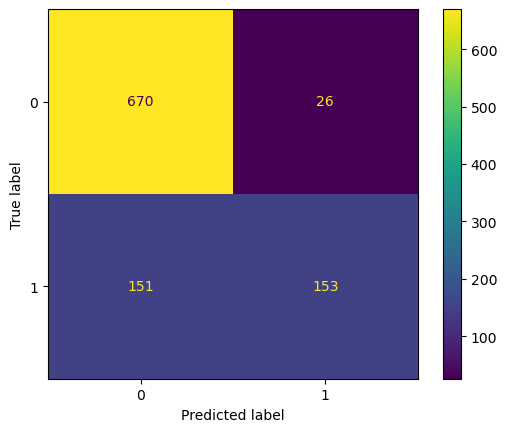

In [94]:
_, x, _ = load_data(sample_files, start=0, end=len(files), augment_fn=get_gaussian_blur_filter(1))
predictions_logits = bc_model.predict(x)
predictions_clss = np.where(predictions_logits > 0.5, 1, 0)

cm = confusion_matrix(sample_true_y, predictions_clss)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(accuracy_score(sample_true_y, predictions_clss))

/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/monika/anaconda3/envs/breastcancer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

<Axes: xlabel='blur factor', ylabel='accuracy'>

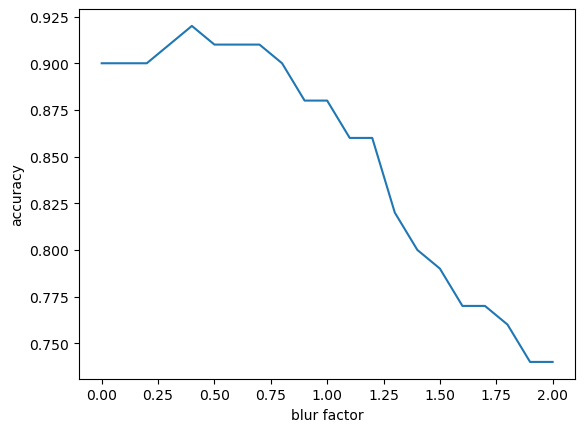

In [91]:
df = pd.DataFrame({'accuracy': accuracies, 'blur factor': blur})
sns.lineplot(df, x='blur factor', y='accuracy')

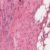

In [85]:
# t = tf.convert_to_tensor(gs_img)
# t = tf.stack([t, t, t], axis=-1)
# t = t[None, :, :, :]
# bc_model.predict(t)
test_img = load_img(sample_files.iloc[2])

from PIL import ImageFilter, ImageEnhance
test_img = test_img.filter(ImageFilter.GaussianBlur(0.5))
test_img


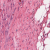

In [77]:
load_img(sample_files.iloc[2])

In [126]:
from PIL import Image
test = Image.open('/home/monika/Moje/ML-sem-III/eml2023/project/original_data_set/BreCaHAD/images/Case_1-01.tif')

In [112]:
i = 300
preds = []
for i in range(300):
    t = test.crop((i, i, i + 50, i + 50))
    t = tf.convert_to_tensor(t)
    t = t[None, :, :, :]
    preds.append(bc_model.predict(t))

1/1 [==============================] - 0s 68ms/step


(array([155.,  42.,  33.,  19.,  14.,  12.,  11.,   5.,   3.,   6.]),
 array([1.90316030e-04, 6.82432875e-02, 1.36296257e-01, 2.04349235e-01,
        2.72402197e-01, 3.40455174e-01, 4.08508152e-01, 4.76561129e-01,
        5.44614077e-01, 6.12667084e-01, 6.80720031e-01]),
 <BarContainer object of 10 artists>)

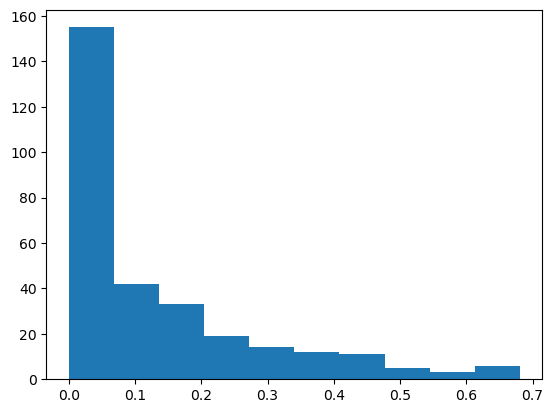

In [116]:
plt.hist([p[0][0] for p in preds])

In [129]:
gt = Image.open('/home/monika/Moje/ML-sem-III/eml2023/project/original_data_set/BreCaHAD/groundTruth_display/Case_1-01.png')


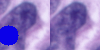

In [164]:
i = 520
im1 = gt.crop((i,i, i +50, i+50))
im2 = test.crop((i, i, i+50, i+50))

Image.fromarray(np.hstack((np.array(im1),np.array(im2))))

In [165]:
t = test.crop((i, i, i + 50, i + 50))
t = tf.convert_to_tensor(t)
t = t[None, :, :, :]
bc_model.predict(t)

1/1 [==============================] - 0s 22ms/step


array([[0.35246116]], dtype=float32)